# Teste de hipótese com uma amostra

# 1. Imports

In [101]:
from typing import Iterable, Tuple

from math import sqrt

import numpy as np

import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# 2. Definição das funções auxiliares

In [102]:
def calcula_valor_critico_teste_z(alpha: float, tipo_teste: str) -> float | Tuple[float, float]:
    """
    Calcula o valor crítico para o teste z
    a partir do nível de significância (alpha)
    e do tipo de teste (unilateral à esquerda,
    unilateral à direita ou bilateral)

    Args:
        alpha(float): nível de significância.
        tipo_teste(str): tipo do teste, como
            descrito acima. Os valores possíveis
            são `esquerda`, `direita` e `bilateral`.
    
    Returns:
        float or Tuple[float, float]: valor(es)
            crítico(s) de acordo com os valores
            passados.

    Raises:
        AssertionError: se o valor da variável
            `tipo_teste` não for um dos valores pré-definidos.
    """
    tipo_teste = tipo_teste.lower()

    assert tipo_teste in ["esquerda", "direita", "bilateral"], \
            "O valor do parâmetro tipo teste precisa ser 'esquerda', 'direita' ou 'bilateral"
    
    if tipo_teste == "esquerda":
        valor_critico = float(st.norm.ppf(alpha))

        return round(valor_critico, 3)
    elif tipo_teste == "direita":
        valor_critico = float(st.norm.ppf(1 - alpha))

        return round(valor_critico, 3)
    else:
        valor_critico_esquerda = float(st.norm.ppf(alpha / 2))

        valor_critico_direita = valor_critico_esquerda * -1

        return round(valor_critico_esquerda, 3), round(valor_critico_direita, 3)
        
def calcula_valor_critico_teste_t(alpha: float, graus_liberdade: int,
                                  tipo_teste: str) -> float | Tuple[float, float]:
    """
    Calcula o(s) valor(es) crítico(s) para o teste t.

    Args:
        alpha(float): nível de significância.
        graus_liberdade(int): graus de liberdade
            do teste, definido como n - 1.
        tipo_teste(str): tipo do teste, como
            descrito acima. Os valores possíveis
            são `esquerda`, `direita` e `bilateral`.
    
    Returns:
        float or Tuple[float, float]: valor(es)
            crítico(s) de acordo com os valores
            passados.

    Raises:
        AssertionError: se o valor da variável
            `tipo_teste` não for um dos valores pré-definidos.
    """
    tipo_teste = tipo_teste.lower()

    assert tipo_teste in ["esquerda", "direita", "bilateral"], \
            "O valor do parâmetro tipo teste precisa ser 'esquerda', 'direita' ou 'bilateral"
    
    if tipo_teste == 'bilateral':
        t0 = st.t.ppf(1 - alpha/2, graus_liberdade)

        return float(round(-t0, 3)), float(round(t0, 3))
    else:
        if tipo_teste == 'esquerda':
            return float(round(st.t.ppf(alpha, graus_liberdade), 3))
        
        return float(round(st.t.ppf(1 - alpha, graus_liberdade), 3))


In [103]:
def calcula_valor_critico_teste_qui_quadrado(alpha: float, graus_liberdade: int,
                                             tipo_teste: str) -> float | Tuple[float, float]:
    """
    Calcula o(s) valor(es) crítico(s) para
    um teste de hipótese para a variância
    ou o desvio padrão, que usa como base a
    distribuição qui-quadrado.

    Args:
        alpha(float): nível de significância.
        graus_liberdade(int): graus de liberdade
            do teste, definido como n - 1.
        tipo_teste(str): string que indica a natureza
            do teste (bilateral ou unilateral à esquerda/
            direita). Os valores possíveis são 'esquerda',
            'direita' e 'bilateral'.

    Returns:
        float or Tuple[float, float]: valor crítico,
            se o teste for unilateral; ou os dois valores
            críticos, se o teste for bilateral.

    Raises:
        AssertionError: se o valor da variável
            `tipo_teste` não for um dos valores pré-definidos.
    """
    tipo_teste = tipo_teste.lower()

    assert tipo_teste in ["esquerda", "direita", "bilateral"], \
            "O valor do parâmetro tipo teste precisa ser 'esquerda', 'direita' ou 'bilateral"

    if tipo_teste == 'bilateral':
        valor_critico_esquerda = float(st.chi2.ppf(alpha / 2, graus_liberdade))
        valor_critico_direita = float(st.chi2.ppf(1 - alpha / 2, graus_liberdade))

        return round(valor_critico_esquerda, 3), round(valor_critico_direita, 3)
    else:
        if tipo_teste == 'esquerda':
            return round(float(st.chi2.ppf(alpha, graus_liberdade)), 3)
        
        return round(float(st.chi2.ppf(1 - alpha, graus_liberdade)), 3)

In [104]:
def calcula_estatistica_padronizada_media(media_amostral: float, media_populacional: float,
                                          desvio_padrao: float, n: int) -> float:
    """
    Calcula a estatística de teste padronizada
    para testes da média (desvio padrão conhecido ou não).

    Args:
        media_amostral(float): média da amostra.
        media_populacional(float): média afirmada
            para da população.
        desvio_padrao(float): desvio padrão amostral
            ou populacional (a depender do teste).
        n(int): tamanho da amostra.

    Returns:
        est(float): estatística de teste padronizada z ou t
            (a depender do teste) arredondada para três casas
            decimais depois da vírgula.
    """

    est =  (media_amostral - media_populacional) / (desvio_padrao / sqrt(n))

    return round(est, 3)

def calcula_estatistica_padronizada_proporcao(proporcao_amostral: float,
                                              proporcao_populacional: float,
                                              n: int) -> float:
    """
    Calcula a estatística de teste padronizada z
    para um teste de hipótese para proporção.

    Args:
        proporcao_amostral(float): valor da proporção
            para a amostra.
        proporcao_populacional(float): valor da proporção
            para a população.
        n(int): tamanho da amostra

    Returns:
        z(float): estatística de teste padronizada z
            calculada de acordo com os valores acima.
    """
    q = 1 - proporcao_populacional

    z = (proporcao_amostral - proporcao_populacional) / sqrt((proporcao_populacional * q) / n)

    return round(z, 3)

In [105]:
def calcula_estatistica_padronizada_variancia_desvio_padrao(n: int,
                                                            estatistica: float,
                                                            parametro_populacional: float,
                                                            variancia: bool = True) -> float:
    """
    Calcula a estatística de teste padronizada x²
    para um teste de hipótese para a variância ou
    para o desvio padrão.

    Args:
        n(int): tamanho da amostra.
        estatística(float): valor da variância
            ou do desvio padrão amostral.
        parametro_populacional(float): valor da
            variância ou do desvio padrão
            populacional.
        variancia(:obj:`bool`, optional): indica
            se o teste está sendo realizado para
            a variância (True) ou para o desvio-padrão
            (False). O valor padrão é False.

    Returns:
        float: estatística de teste padronizada X²
            calculada com base nos valores acima.
    """
    if not variancia:
        estatistica = estatistica ** 2
        parametro_populacional = parametro_populacional ** 2

    return round(((n - 1) * estatistica) / parametro_populacional, 3)    

In [106]:
def plota_distribuicao_normal(valor_critico: float | Iterable,
                              estatistica_teste: float) -> None:
    """
    Plota uma distribuição normal marcando
    o valor crítico de um teste z (isto é,
    a(s) região(ões) de rejeição) e a estatística de teste padronizada.

    Args:
        valor_critico(float or Iterable): valor(es) crítico(s)
            do teste. Se forem passados dois valores,
            o negativo deverá ser o primeiro.
        estatistica_teste(float): estatística de
            teste padronizada z.
    """
    plt.rcParams['figure.figsize'] = (12, 8)

    # Parâmetros da normal perfeita
    mu = 0       # média
    sigma = 1    # desvio padrão

    # Criar uma sequência de valores
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

    # Calcular a PDF da normal
    y = st.norm.pdf(x, mu, sigma)

    # Plotar a curva
    ax = sns.lineplot(x=x, y=y)

    # Marcar o(s) valores críticos

    if isinstance(valor_critico, Iterable):
        # Teste bilateral
        valor_critico_esquerda = valor_critico[0]
        valor_critico_direita = valor_critico[1]

        x_left = x[x < valor_critico_esquerda]
        y_left = st.norm.pdf(x_left, mu, sigma)

        plt.fill_between(
            x_left,
            y_left,
            color='red',
            alpha=0.3,
            label=f'Regiões de rejeição (z < {valor_critico_esquerda}; e z > {valor_critico_direita})'
        )

        x_right = x[x > valor_critico_direita]
        y_right = st.norm.pdf(x_right, mu, sigma)

        plt.fill_between(
            x_right,
            y_right,
            color='red',
            alpha=0.3
        )

        # Linhas verticais nos valores críticos
        plt.axvline(valor_critico_esquerda, color='red', linestyle='--')
        plt.axvline(valor_critico_direita, color='red', linestyle='--')
    else:
        if valor_critico < 0:
            # Teste unilateral à esquerda
            x_plot = x[x < valor_critico]
            y_plot = st.norm.pdf(x_plot, mu, sigma)

            plt.fill_between(
                x_plot,
                y_plot,
                color='red',
                alpha=0.3,
                label=f'Região de rejeição (z < {valor_critico})'
            )

            plt.axvline(valor_critico, color='red', linestyle='--')
        else:
            # Teste unilateral à direita
            x_plot = x[x > valor_critico]
            y_plot = st.norm.pdf(x_plot, mu, sigma)

            plt.fill_between(
                x_plot,
                y_plot,
                color='red',
                alpha=0.3,
                label=f'Região de rejeição (z > {valor_critico})'
            )

            plt.axvline(valor_critico, color='red', linestyle='--')

    plt.axvline(
        estatistica_teste, 
        color='blue',
        linestyle='--',
        label=f'Estatística de teste padronizada z = {estatistica_teste}'
    )


    ax.set_xlabel('Valor de z')
    ax.set_ylabel('Densidade de Probabilidade')
    ax.set_title('Distribuição normal com região(ões) de rejeição e estatística de teste padronizada')

    plt.legend(loc='upper right')

    plt.tight_layout()

    plt.show()
 

In [107]:
def plota_distribuicao_t(valor_critico: float | Iterable,
                        estatistica_teste: float, graus_liberdade: int) -> None:
    """
    Plota uma distribuição t marcando
    o valor crítico de um teste t (isto é,
    a(s) região(ões) de rejeição) e a estatística de teste padronizada.

    Parameters:
        valor_critico(float or Iterable): valor(es) crítico(s)
        do teste. Se forem passados dois valores,
        o negativo deverá ser o primeiro.
        estatistica_teste(float): estatística de
        teste padronizada t.
        graus_liberdade(int): graus de liberdade do teste.
    """
    plt.rcParams['figure.figsize'] = (12, 8)

    # Domíno
    x = np.linspace(-4, 4, 1000)

    # Densidade da distribuição t
    y = st.t.pdf(x, graus_liberdade)

    # Plotar a curva
    ax = sns.lineplot(
        x=x,
        y=y,
        label=f"Distribuição t (g. l. = {graus_liberdade})"
    )

    # Marcar o(s) valores críticos

    if isinstance(valor_critico, Iterable):
        # Teste bilateral
        valor_critico_esquerda = valor_critico[0]
        valor_critico_direita = valor_critico[1]

        x_left = x[x <= valor_critico_esquerda]
        y_left = st.t.pdf(x_left, graus_liberdade)

        plt.fill_between(
            x_left,
            y_left,
            color='red',
            alpha=0.3,
            label=f'Regiões de rejeição (t < {valor_critico_esquerda}; e t > {valor_critico_direita})'
        )

        x_right = x[x >= valor_critico_direita]
        y_right = st.t.pdf(x_right, graus_liberdade)

        plt.fill_between(
            x_right,
            y_right,
            color='red',
            alpha=0.3
        )

        # Linhas verticais nos valores críticos
        plt.axvline(valor_critico_esquerda, color='red', linestyle='--')
        plt.axvline(valor_critico_direita, color='red', linestyle='--')
    else:
        if valor_critico < 0:
            # Teste unilateral à esquerda
            x_plot = x[x <= valor_critico]
            y_plot = st.t.pdf(x_plot, graus_liberdade)

            plt.fill_between(
                x_plot,
                y_plot,
                color='red',
                alpha=0.3,
                label=f'Região de rejeição (t < {valor_critico})'
            )

            plt.axvline(valor_critico, color='red', linestyle='--')
        else:
            # Teste unilateral à direita
            x_plot = x[x >= valor_critico]
            y_plot = st.t.pdf(x_plot, graus_liberdade)

            plt.fill_between(
                x_plot,
                y_plot,
                color='red',
                alpha=0.3,
                label=f'Região de rejeição (t > {valor_critico})'
            )

            plt.axvline(valor_critico, color='red', linestyle='--')
            
    plt.axvline(
        estatistica_teste, 
        color='blue',
        linestyle='--',
        label=f'Estatística de teste padronizada t = {estatistica_teste}'
    )


    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidade')
    ax.set_title('Região(ões) de rejeição e estatística de teste padronizada')

    plt.legend(loc='upper right')

    plt.tight_layout()

    plt.show()
 

In [108]:
def plota_distribuicao_qui_quadrado(alpha: float, graus_liberdade: int,
                                    valor_critico: float | Tuple[float, float],
                                    estatistica_teste: float, tipo_teste: str) -> None:
    """
    Gera um gráfico para uma distribuição
    qui-quadrado usada num teste de hipótese
    marcando a(s) região(ões) de rejeição
    e a estatística de teste padronizada.

     Parameters:
        alpha(float): nível de significância.
        graus_liberdade(int): graus de liberdade do teste.
        valor_critico(float or Iterable): valor(es) crítico(s)
            do teste. Se forem passados dois valores,
            o negativo deverá ser o primeiro.
        estatistica_teste(float): estatística de
            teste padronizada χ².
        tipo_teste(str): string que indica a natureza
            do teste (bilateral ou unilateral à esquerda/
            direita). Os valores possíveis são 'esquerda',
            'direita' e 'bilateral'.
    Raises:
        AssertionError: se o valor da variável
            `tipo_teste` não for um dos valores pré-definidos.
        
    """
    tipo_teste = tipo_teste.lower()

    assert tipo_teste in ["esquerda", "direita", "bilateral"], \
            "O valor do parâmetro tipo teste precisa ser 'esquerda', 'direita' ou 'bilateral"
    
    # Domínio x e PDF
    x = np.linspace(st.chi2.ppf(0.001, graus_liberdade), st.chi2.ppf(0.999, graus_liberdade), 1000)
    y = st.chi2.pdf(x, graus_liberdade)

    plt.rcParams['figure.figsize'] = (12, 8)

    sns.lineplot(
        x=x,
        y=y,
        color='blue',
        label=f"χ² (g. l. = {graus_liberdade})"
    )

    if tipo_teste == 'bilateral':
        valor_critico_esquerda = valor_critico[0]
        valor_critico_direita = valor_critico[1]

        plt.fill_between(
            x,
            0,
            y,
            where=(x < valor_critico_esquerda),
            color='red',
            alpha=0.4,
            label=f"Regiões de rejeição (χ² < {valor_critico_esquerda}; e χ² > {valor_critico_direita})"
        )

        plt.fill_between(
            x,
            0,
            y,
            where=(x > valor_critico_direita),
            color='red',
            alpha=0.4
        )

        plt.axvline(valor_critico_esquerda, color='red', linestyle='--')
        plt.axvline(valor_critico_direita, color='red', linestyle='--')
    else: # Teste unilateral
        if tipo_teste == 'esquerda':
            plt.fill_between(x, 0, y, where=(x < valor_critico), color='red', alpha=0.4, label=f"Região de rejeição (χ² < {valor_critico})")

            plt.axvline(valor_critico, color='red', linestyle='--')
        else:
            # à direita
             plt.fill_between(x, 0, y, where=(x > valor_critico), color='red', alpha=0.4, label=f"Região de rejeição (χ² > {valor_critico})")

             plt.axvline(valor_critico, color='red', linestyle='--')


    plt.axvline(
        estatistica_teste, 
        color='blue',
        linestyle='--',
        label=f'Estatística de teste padronizada t = {estatistica_teste}'
    )

    plt.title(f"Distribuição Qui-Quadrado com Regiões de Rejeição (alpha = {alpha})")
    plt.xlabel("Valor de χ²")
    plt.ylabel("Densidade de Probabilidade")

    plt.legend(loc='upper right')

    plt.tight_layout()
    
    plt.show()

# 3. Teste de hipótese para a média - desvio padrão conhecido

## 3. 1. Teste unilateral à esquerda

<p><b>Enunciado:</b> Um fabricante de lâmpadas garante que a
vida útil média de certo tipo de lâmpada é de pelo menos 750 horas. Uma amostra aleatória de 25 lâmpadas
apresentou vida útil média de 745 horas. Suponha que a
população é normalmente distribuída e o desvio padrão
populacional é de 60 horas. Para o nível de significância
a = 0,02, há evidência suficiente para rejeitar a afirmação do fabricante?</p>

In [109]:
# Definição das variáveis
media_amostral = 745
media_populacional = 750
n = 25
desvio_padrao = 60
alpha = 0.02

### 3. 1. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu \geq 750\quad(Afirma\c{c}ão.) \\
H_a: \mu \lt 750
\end{cases}
$$

### 3. 1. 2. Cálculo do valor crítico e definição da região de rejeição

In [110]:
valor_critico = calcula_valor_critico_teste_z(alpha, 'esquerda')

print(f"Valor crítico: {valor_critico}")
print(f"Região de rejeição: z < {valor_critico}")

Valor crítico: -2.054
Região de rejeição: z < -2.054


### 3. 1. 3. Cálculo da estatística de teste padronizada

-0.417
False


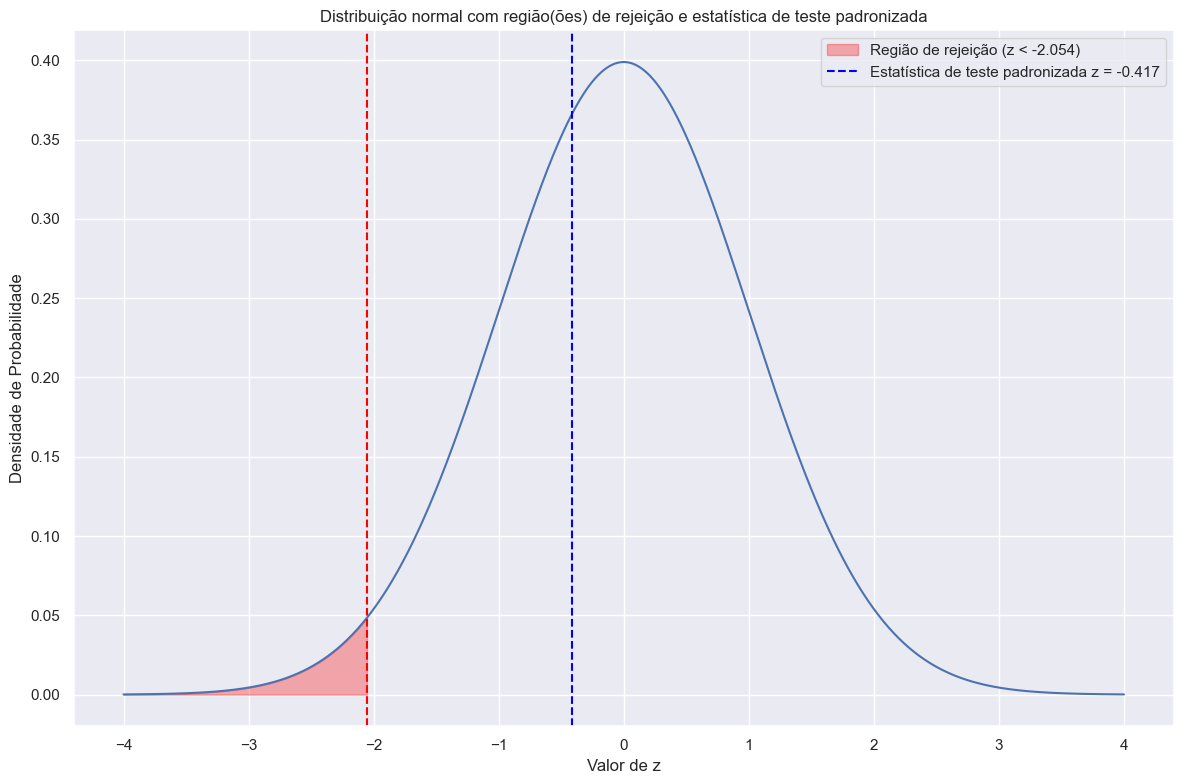

In [111]:
z = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(z)
print(z < valor_critico)

plota_distribuicao_normal(
    valor_critico=valor_critico,
    estatistica_teste=z
)

### 3. 1. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque <i>z</i> está fora da região de rejeição.</p>

### 3. 1. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, a nível de significância de 2%, para rejeitar a afirmação do fabricante de que a vida útil média de certo tipo de lâmpada é de pelo menos 750 horas.</p>

## 3. 2. Teste unilateral à direita

<p><b>Enunciado:</b> Um restaurante fast food estima que o conteúdo médio de sódio em um de seus sanduíches do
café da manhã é não mais que 920 mg. Uma amostra
aleatória de 44 sanduíches do café da manhã apresentou
um conteúdo médio de sódio de 925 mg. Suponha que o
desvio padrão populacional é de 18 mg. Para o nível de
significância a = 0,10, há evidência suficiente para rejeitar a afirmação do restaurante?</p>

In [112]:
# Definição das variáveis
media_populacional = 920
n = 44
media_amostral = 925
desvio_padrao = 18
alpha = 0.10

### 3. 2. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu \leq 920\quad(Afirma\c{c}ão.) \\
H_a: \mu \gt 920
\end{cases}
$$

### 3. 2. 2. Cálculo do valor crítico e definição da região de rejeição

In [113]:
valor_critico = calcula_valor_critico_teste_z(
    alpha=alpha,
    tipo_teste='direita'
)

print(f"Valor crítico: {valor_critico}")
print(f"Região de reijeição z > {valor_critico}")

Valor crítico: 1.282
Região de reijeição z > 1.282


### 3. 2. 3. Cálculo da estatística de teste padronizada

1.843
True


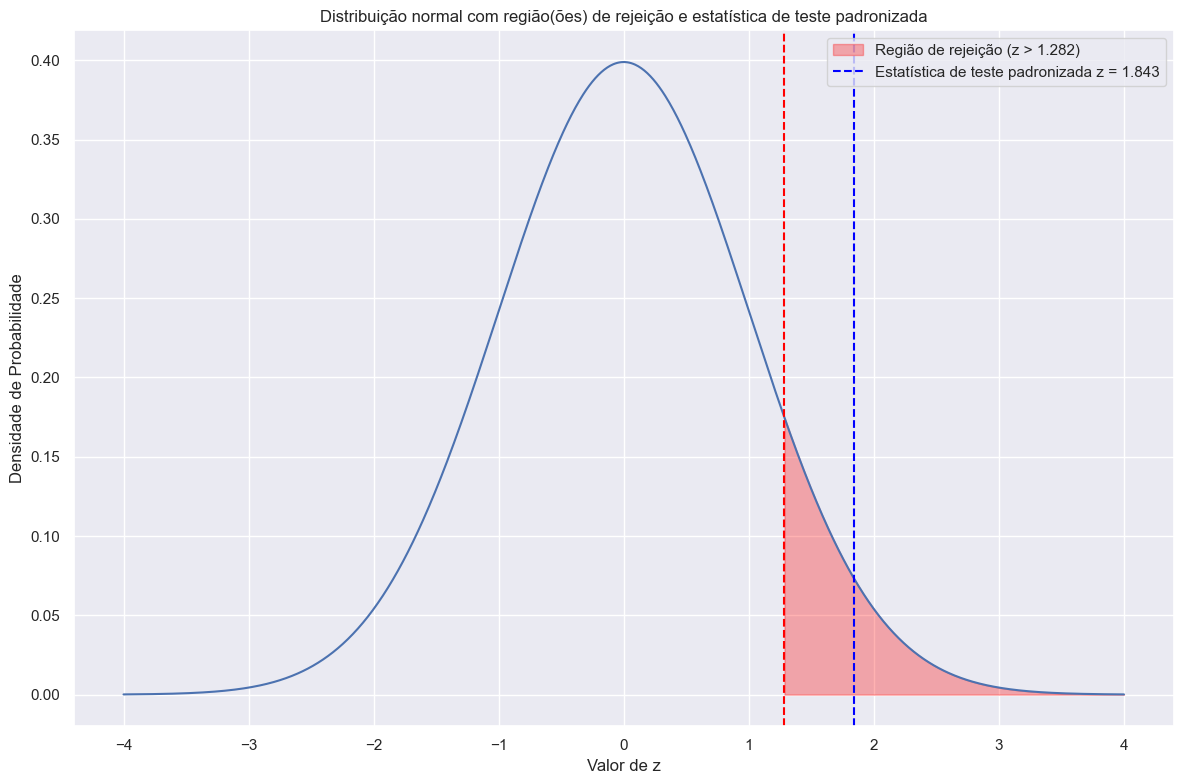

In [114]:
z = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(z)
print(z > valor_critico)

plota_distribuicao_normal(
    valor_critico=valor_critico,
    estatistica_teste=z
)

### 3. 2. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula deve ser rejeitada porque z pertence à região de rejeição.</p>

### 3. 2. 5. Interpretação da decisão no contexto da afirmação original

<p>Há evidência suficiente, a nível de significância de 10%, para rejeitar a afirmação do restaurante fast food de que o conteúdo médio de sódio em um de seus sanduíches do café da manhã é não mais que 920 mg.</p>

## 3. 3. Teste bilateral

<p><b>Enunciado:</b> Uma
empresa fabricante de bebidas à base de cola declara
que o conteúdo médio de cafeína, por garrafa de 12 onças, é de 40 mg. Você quer testar essa afirmação. Durante seus testes, você descobre que uma amostra aleatória
de vinte garrafas de 12 onças de bebida à base de cola
tem um conteúdo médio de cafeína de 39,2 mg. Suponha que a população é normalmente distribuída e que
o desvio padrão populacional é de 7,5 mg. Para a = 0,01,
você pode rejeitar a afirmação da empresa?</p>

In [115]:
media_populacional = 40
n = 20
media_amostral = 39.2
desvio_padrao = 7.5
alpha = 0.01

### 3. 3. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu = 40\quad(Afirma\c{c}ão.) \\
H_a: \mu \neq 40
\end{cases}
$$

### 3. 3. 2. Cálculo do valor crítico e definição da região de rejeição

In [116]:
valores_criticos = calcula_valor_critico_teste_z(
    alpha=alpha,
    tipo_teste='bilateral'
)

print(valores_criticos)

(-2.576, 2.576)


### 3. 3. 3. Cálculo da estatística de teste padronizada

-0.477
False


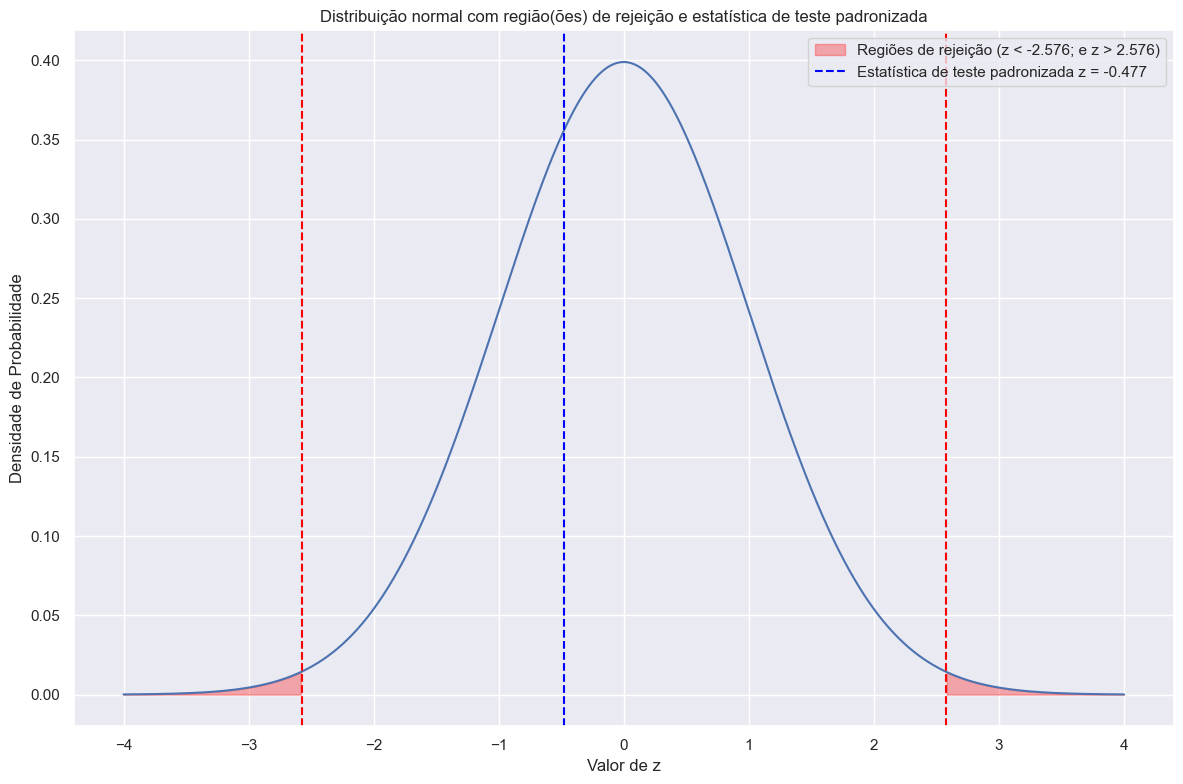

In [117]:
z = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(z)
print(z < valores_criticos[0] or z > valores_criticos[1])

plota_distribuicao_normal(
    valor_critico=valores_criticos,
    estatistica_teste=z
)

### 3. 3. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque z não pertence a nenhuma das regiões de rejeição</p>

### 3. 3. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, ao nível de significância de 1%, para rejeitar a afirmação da empresa de que o conteúdo médio de cafeína é de 40 mg.</p>

 # 4. Teste de hipótese para a média - desvio padrão desconhecido

## 4. 1. Teste unilateral à esquerda

<p><b>Enunciado:</b> Um vendedor de carros usados diz que o preço médio do sedan
de dois anos (em boas condições) é de pelo menos US$ 20.500. Você
suspeita que essa afirmação é incorreta e descobre que uma amostra
aleatória de 14 veículos similares tem um preço médio de US$ 19.850
e desvio padrão de US$ 1.084. Há evidência suficiente para rejeitar
a afirmação do vendedor para o nível de significância a = 0,05? Suponha que a população é normalmente distribuída.</p>

### 4. 1. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu \geq 20.500\quad(Afirma\c{c}ão.) \\
H_a: \mu \lt 20.500
\end{cases}
$$

In [118]:
media_populacional = 20500
n = 14
media_amostral = 19850
desvio_padrao = 1084
alpha = 0.05

graus_liberdade = n -1

### 4. 1. 2. Cálculo do valor crítico e definição da região de rejeição

In [119]:
valor_critico = calcula_valor_critico_teste_t(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    tipo_teste='esquerda'
)

print(valor_critico)
print(f"Região de rejeição: t < {valor_critico}")

-1.771
Região de rejeição: t < -1.771


### 4. 1. 3. Cálculo da estatística de teste padronizada

-2.244
True


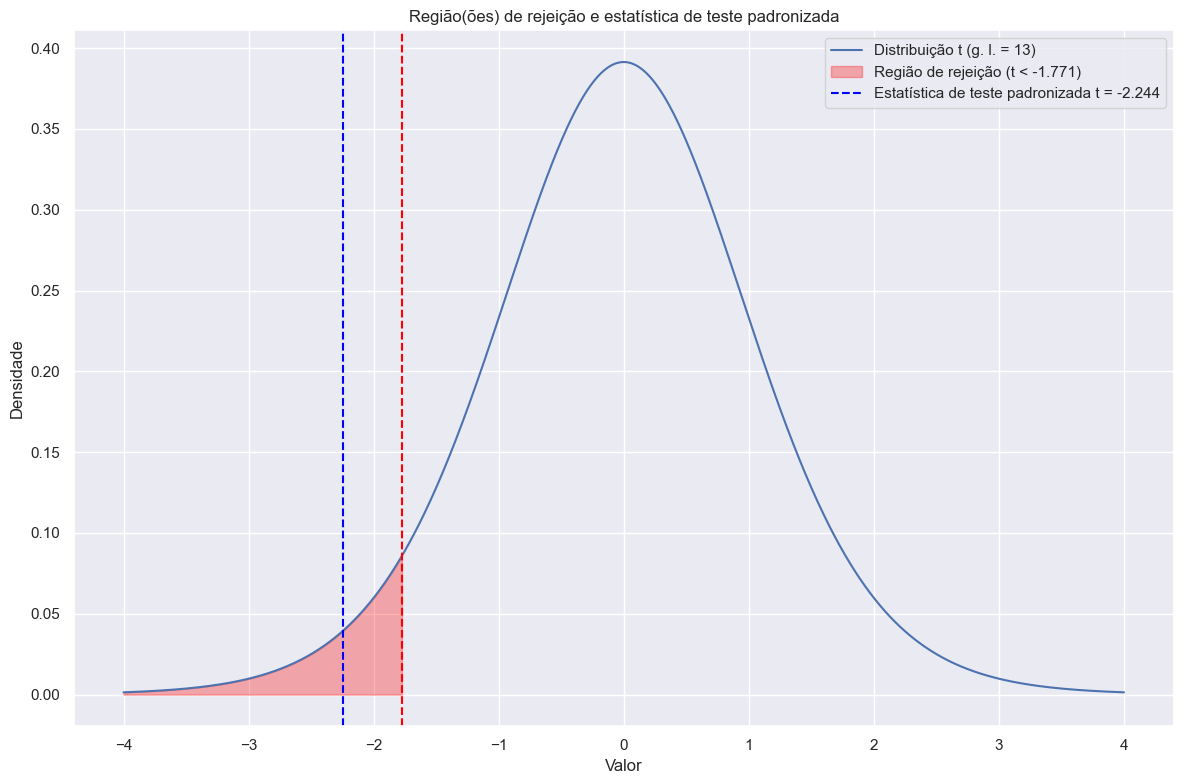

In [120]:
t = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(t)
print(t < valor_critico)

plota_distribuicao_t(
    valor_critico=valor_critico,
    estatistica_teste=t,
    graus_liberdade=graus_liberdade
)

### 4. 1. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula deve ser rejeitada porque t está dentro da região de rejeição.</p>

### 4. 1. 5. Interpretação da decisão no contexto da afirmação original
<p>Há evidência suficiente, a nível de significância de 5%, para rejeitar a afirmação do vendedor de que o preço médio do sedan
de dois anos (em boas condições) é de pelo menos US$ 20.500.</p>

## 4. 2. Teste unilateral à direita

<p><b>Enunciado:</b> A Receita Federal afirma que o tempo médio de espera nas ligações, durante um período recente de preenchimento de declaração, era de no máximo 15 minutos. Uma amostra aleatória
de 40 ligações resultou em um tempo médio de espera de
16,7 minutos e um desvio padrão de 2,7 minutos. Há evidência suficiente para rejeitar a afirmação considerando
o nível de significância a = 0,01?</p>

In [121]:
media_populacional = 15
n = 40
media_amostral = 16.7
desvio_padrao = 2.7
alpha = 0.01

graus_liberdade = n - 1

### 4. 2. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu \leq 15\quad(Afirma\c{c}ão.) \\
H_a: \mu \gt 15
\end{cases}
$$

### 4. 2. 2. Cálculo do valor crítico e definição da região de rejeição

In [122]:
valor_critico = calcula_valor_critico_teste_t(
    alpha=alpha,
    graus_liberdade=n -1,
    tipo_teste='direita'
)

print(valor_critico)
print(f"Região de rejeição: z > {valor_critico}")

2.426
Região de rejeição: z > 2.426


### 4. 2. 3. Cálculo da estatítistica de teste padronizada

3.982
True


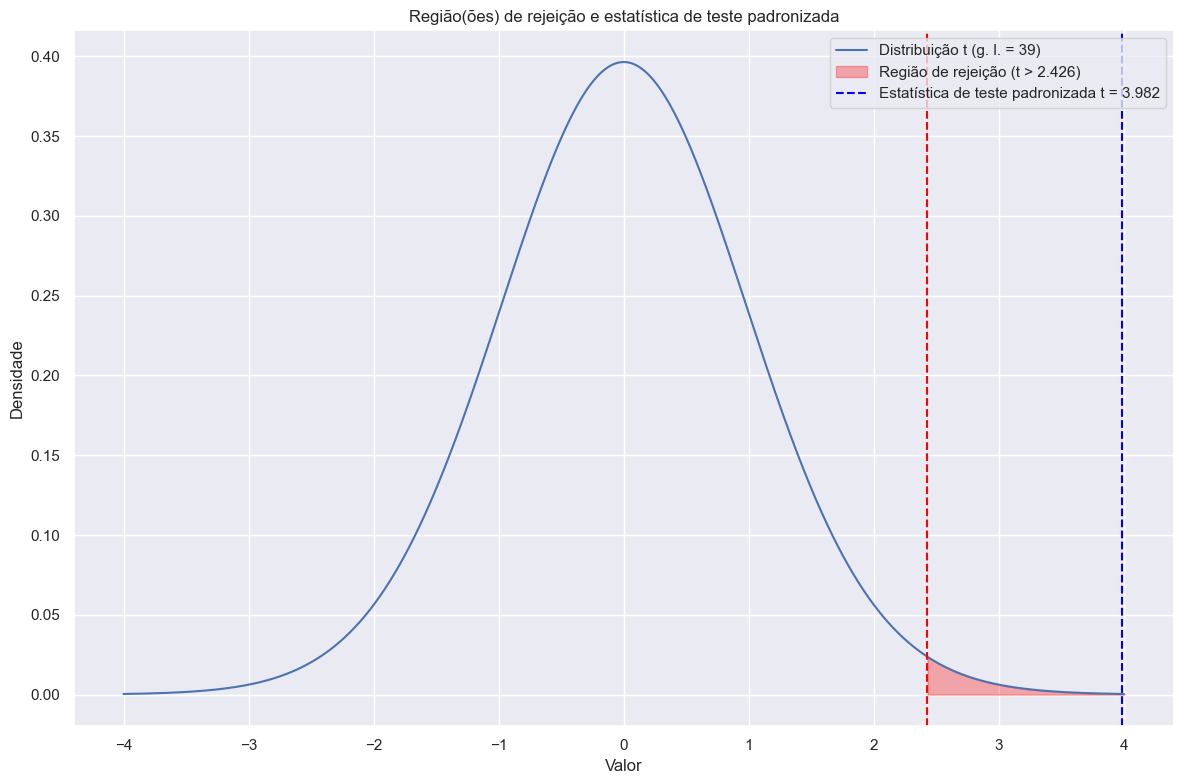

In [123]:
t = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(t)
print(t > valor_critico)

plota_distribuicao_t(
    valor_critico=valor_critico,
    estatistica_teste=t,
    graus_liberdade=graus_liberdade
)


### 4. 2. 4. Tomada de decisão de rejeitar ou não a hipótese nula
<p>A hipótese nula deve ser rejeitada porque t pertence à região de rejeição.</p>

### 4. 2. 5. Interpretação da decisão no contexto da afirmação original

<p>Há evidência suficiente, a nível de significância de 1%, para rejeitar a afirmação da Receita Federal de que  o tempo médio de espera nas ligações, durante um período recente de preenchimento de declaração, era de no máximo 15 minutos.</p>

## 4. 3. Teste bilateral

<p><b>Enunciado:</b> Uma indústria afirma que o nível médio do pH da água em um
rio próximo é de 6,8. Você seleciona aleatoriamente 39 amostras de
água e mede o pH de cada uma. A média amostral e o desvio padrão
são de 6,7 e 0,35, respectivamente. Há evidência suficiente para rejeitar a afirmação da indústria considerando nível de significância
a = 0,05?</p>

In [124]:
media_populacional = 6.8
n = 39
media_amostral = 6.7
desvio_padrao = 0.35
alpha = 0.05

graus_liberdade = n - 1

### 4. 3. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: \mu = 6,8\quad(Afirma\c{c}ão.) \\
H_a: \mu \not = 6,8
\end{cases}
$$

### 4. 3. 2. Cálculo do valor crítico e definição da região de rejeição

In [125]:
valores_criticos = calcula_valor_critico_teste_t(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    tipo_teste='bilateral'
)

print(valores_criticos)
print(f"Regiões de rejeição: t < {valores_criticos[0]}; e t > {valores_criticos[1]}")

(-2.024, 2.024)
Regiões de rejeição: t < -2.024; e t > 2.024


### 4. 3. 3. Cálculo da estatítistica de teste padronizada

-1.784
False


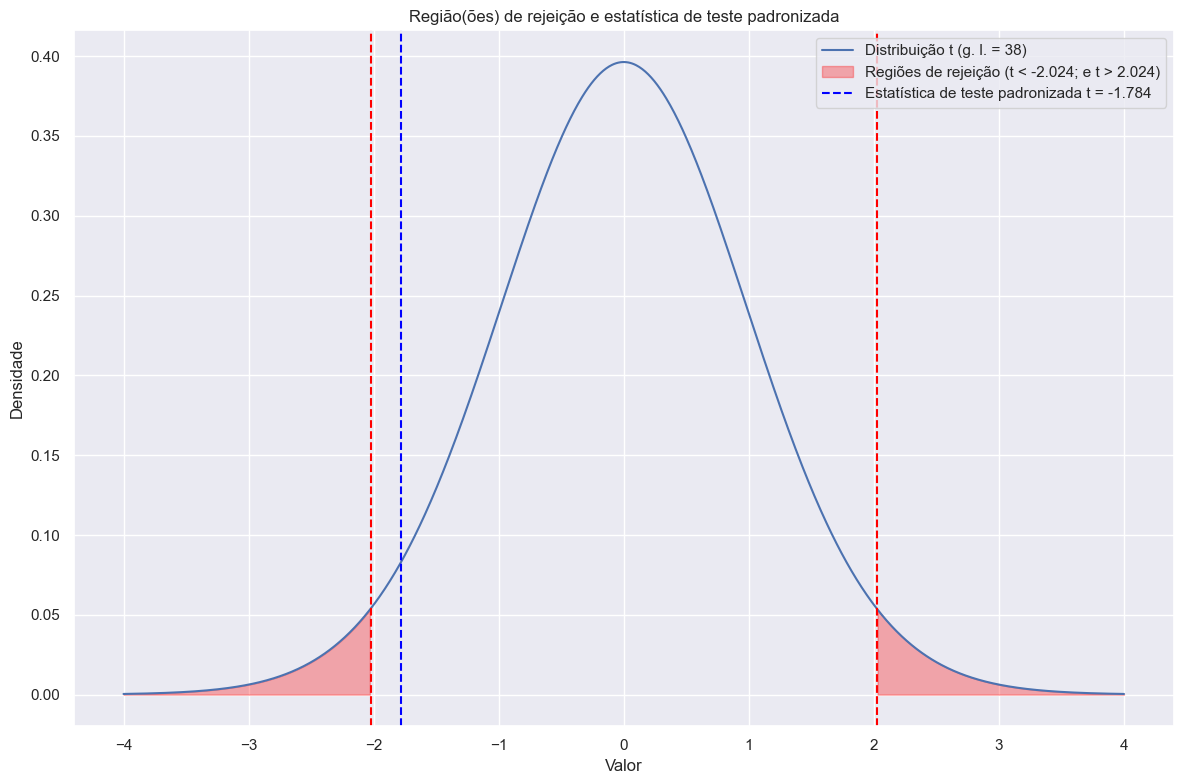

In [126]:
t = calcula_estatistica_padronizada_media(
    media_amostral=media_amostral,
    media_populacional=media_populacional,
    desvio_padrao=desvio_padrao,
    n=n
)

print(t)
print(t < valores_criticos[0] or t > valores_criticos[1])

plota_distribuicao_t(
    valor_critico=valores_criticos,
    estatistica_teste=t,
    graus_liberdade=graus_liberdade
)

### 4. 3. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque t não pertence a nenhuma das regiões de rejeição.</p>

### 4. 3. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, a nível de significância de 5%, para rejeitar a afirmação da indústria de que o pH médio é 6,8.</p>

# 5. Teste de hipótese para a proporção

## 5. 1. Teste unilateral à esquerda

<p><b>Enunciado:</b> Um pesquisador afirma que menos de 40% dos proprietários de telefone celular nos Estados Unidos usam seus aparelhos para a maioria
de suas navegações on-line. Em uma amostra aleatória de 100 adultos,
31% dizem que usam seus aparelhos para a maioria de suas navegações
on-line. Considerando o nível de significância a = 0,01, há evidência
suficiente para concordar com a afirmação do pesquisador?</p>

In [127]:
p = 0.4
n = 100
p_amostral = 0.31
alpha = 0.01

### 5. 1. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: p \geq 0,4\\
H_a: p \lt 0,4 \quad (Afirma\c{c}ão.) 
\end{cases}
$$

### 5. 1. 2. Cálculo do valor crítico e definição da região de rejeição

In [128]:
valor_critico = calcula_valor_critico_teste_z(
    alpha=alpha,
    tipo_teste='esquerda'
)

print(valor_critico)
print(f"Região de rejeição: z < {valor_critico}")

-2.326
Região de rejeição: z < -2.326


### 5. 1. 3. Cálculo da estatítistica de teste padronizada

-1.837
False


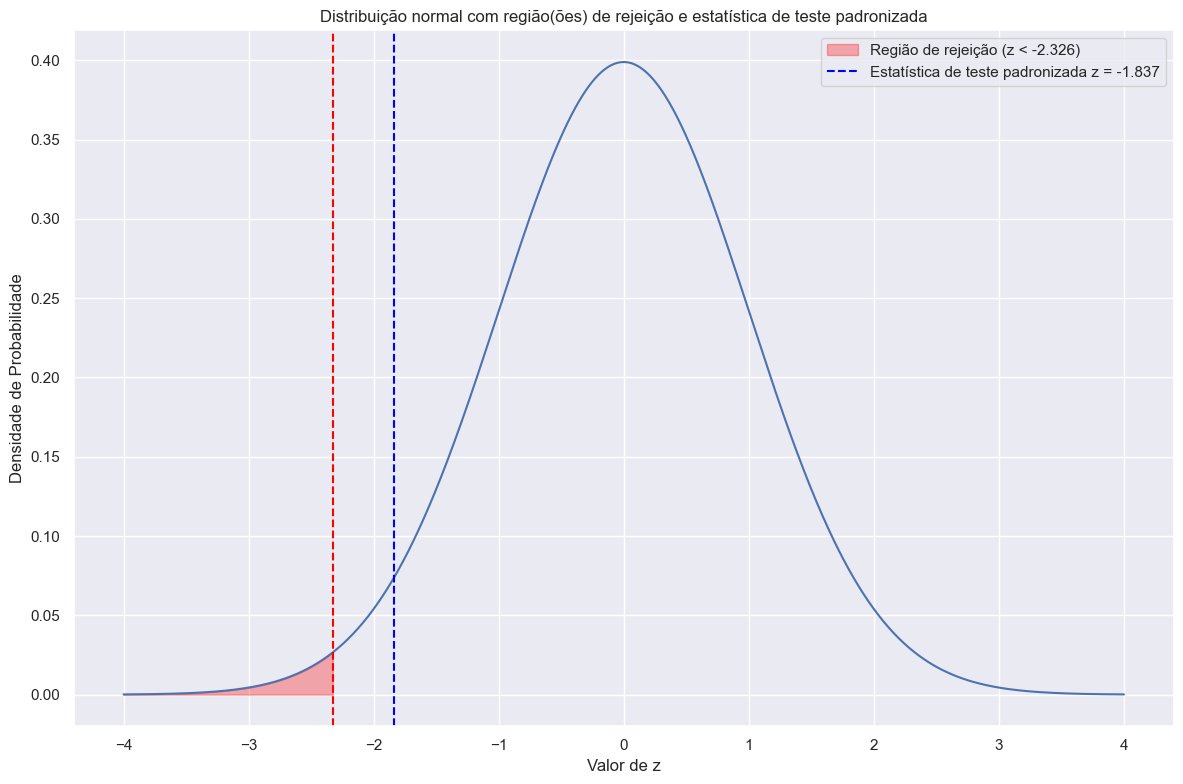

In [129]:
z = calcula_estatistica_padronizada_proporcao(
    proporcao_amostral=p_amostral,
    proporcao_populacional=p,
    n=n
)

print(z)
print(z < valor_critico)

plota_distribuicao_normal(
    valor_critico=valor_critico,
    estatistica_teste=z
)

### 5. 1. 4. Tomada de decisão de rejeitar ou não a hipótese nula


<p>A hipótese nula não deve ser rejeitada porque z está fora da região de rejeição.</p>

### 5. 1. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, ao nível de significância
de 1%, para concordar com a afirmação de que menos de 40% dos proprietários de telefone celular nos Estados Unidos usam seus aparelhos
para a maioria de suas navegações on-line</p>

## 5. 2. Teste unilateral à direita

<p><b>Enunciado: </b>Um centro de
pesquisa afirma que no máximo 75% dos adultos americanos acham que os motoristas estão mais seguros usando celulares com as mãos livres em vez de segurando-os.
Em uma amostra aleatória de 150 adultos americanos,
77% acham que os motoristas estão mais seguros usando celulares com as mãos livres em vez de segurando-os.
Para um nível de significância a = 0,01, há evidência suficiente para rejeitar a afirmação do centro de pesquisa?  </p>

In [130]:
p = 0.75
n = 150
p_amostral = 0.77
alpha = 0.01

### 5. 2. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: p \leq 0,75\quad(Afirma\c{c}ão.) \\
H_a: p \gt 0,75
\end{cases}
$$

### 5. 2. 2. Cálculo do valor crítico e definição da região de rejeição

In [131]:
valor_critico = calcula_valor_critico_teste_z(
    alpha=alpha,
    tipo_teste='direita'
)

print(valor_critico)
print(f"Região de rejeição: z > {valor_critico}")

2.326
Região de rejeição: z > 2.326


### 5. 2. 3. Cálculo da estatística de teste padronizada

0.566
False


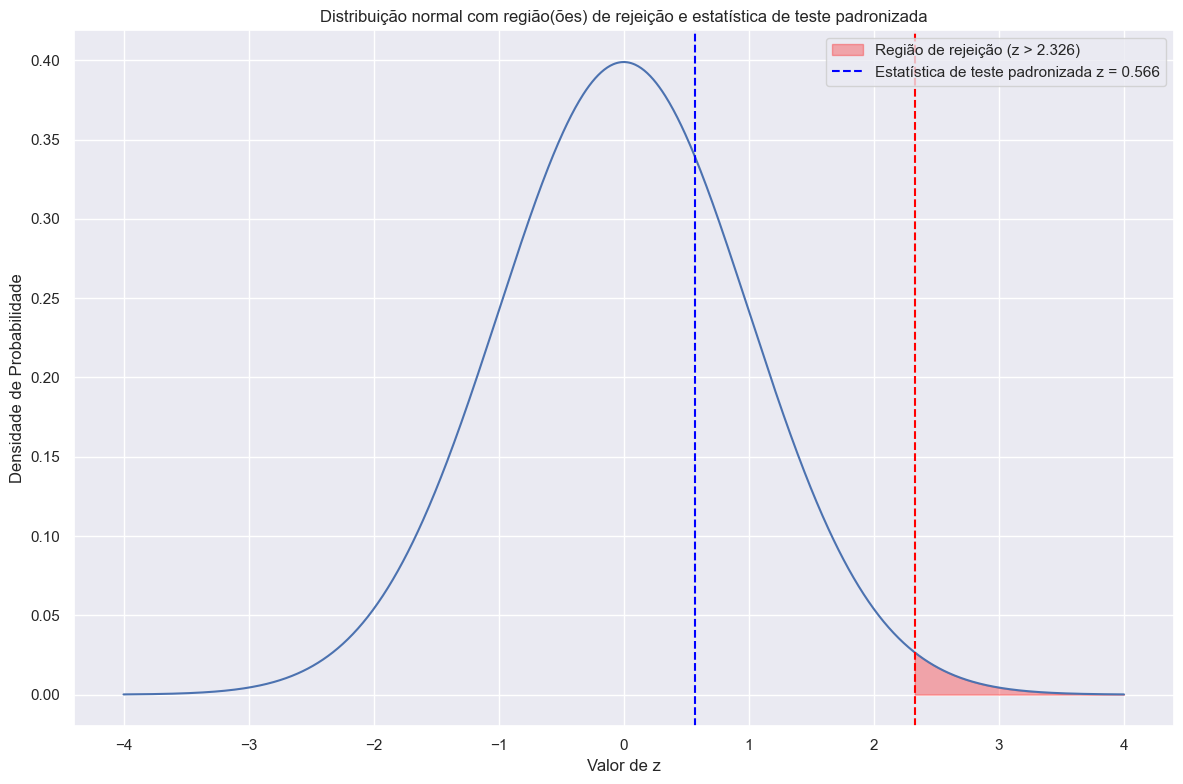

In [132]:
z = calcula_estatistica_padronizada_proporcao(
    proporcao_amostral=p_amostral,
    proporcao_populacional=p,
    n=n
)

print(z)
print(z > valor_critico)

plota_distribuicao_normal(
    valor_critico=valor_critico,
    estatistica_teste=z
)

### 5. 2. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque z não pertence à região de rejeição.</p>

### 5. 2. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, a nível de significiância de 1%, para rejeitar a afirmação do centro de pesquisa de que no máximo 75% dos adultos americanos acham que os motoristas estão mais seguros usando celulares com as mãos livres em vez de segurando-os.</p>

## 5. 3. Teste bilateral

<p><b>Enunciado:</b> Um pesquisador afirma que 86% dos graduados na faculdade dizem
que seu grau universitário foi um bom investimento. Em uma amostra
aleatória de 1.000 graduados, 845 dizem seu grau universitário foi um
bom investimento. Para um nível de significância a = 0,10, há evidência
suficiente para rejeitar a afirmação do pesquisador?</p>

In [133]:
p = 0.86
n = 1000
p_amostral = 845 / n
alpha = 0.10

print(p_amostral)

0.845


### 5. 3. 1. Escrita das hipóteses em notação matemática
$$
\begin{cases}
H_0: p = 0,86\quad(Afirma\c{c}ão.) \\
H_a: p \not = 0,86
\end{cases}
$$

### 5. 3. 2. Cálculo do valor crítico e definição da região de rejeição

In [134]:
valor_critico = calcula_valor_critico_teste_z(
    alpha=alpha,
    tipo_teste='bilateral'
)

print(valor_critico)
print(f"Regiões de rejeição: z < {valor_critico[0]}; e z > {valor_critico[1]}")

(-1.645, 1.645)
Regiões de rejeição: z < -1.645; e z > 1.645


### 5. 3. 3. Cálculo da estatística de teste padronizada

-1.367
False


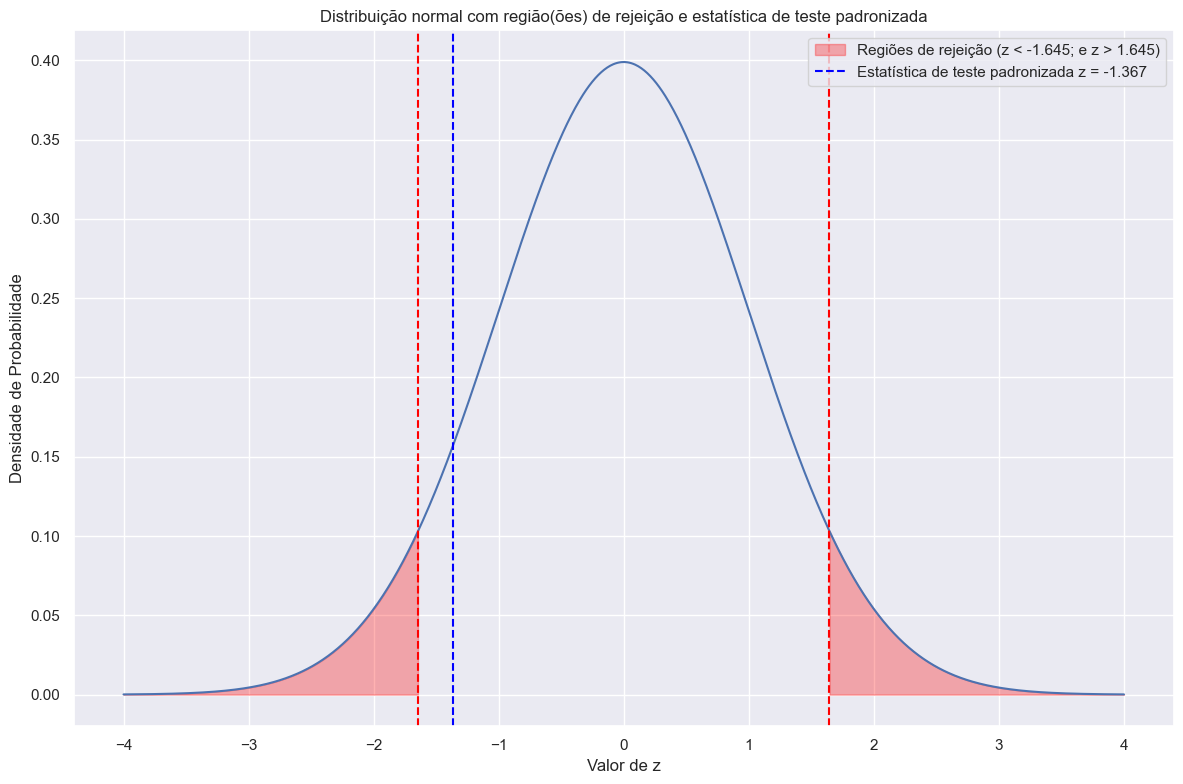

In [135]:
z = calcula_estatistica_padronizada_proporcao(
    proporcao_amostral=p_amostral,
    proporcao_populacional=p,
    n=n
)

print(z)
print(z < valor_critico[0] or z > valor_critico[1])

plota_distribuicao_normal(
    valor_critico=valor_critico,
    estatistica_teste=z
)

### 5. 3. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque z não pertence a nenhuma das regiões de rejeição.</p>

### 5. 3. 5. Interpretação da decisão no contexto da afirmação original

<p>Não há evidência suficiente, ao nível de significância
de 10%, para rejeitar a afirmação de que 86% dos graduados na faculdade dizem que seu grau universitário foi um bom investimento.</p>

# 6. Teste de hipótese para a variância e o desvio padrão

## 6. 1. Teste unilateral à esquerda

<p><b>Enunciado:</b> Uma empresa afirma que o desvio padrão do tempo de duração de
uma ligação recebida para ser transferida para a área correta é menor
que 1,4 minuto. Uma amostra aleatória de 25 ligações recebidas tem
um desvio padrão de 1,1 minuto. Para o nível de significância a = 0,10,
há evidência suficiente para concordar com a afirmação da empresa?
Suponha que a população é normalmente distribuída.</p>

In [136]:
desvio_padrao_populacional = 1.4
n = 25
desvio_padrao_amostral = 1.1
alpha = 0.10

graus_liberdade = n - 1

### 6. 1. 1. Escrita das hipóteses em notação matemática

$$
\begin{cases}
H_0: \sigma  \geq 1,4 \\
H_a: \sigma  \lt 1,4 \quad(Afirma\c{c}ão.)
\end{cases}
$$


### 6. 1. 2. Cálculo do valor crítico e definição de região de rejeição

In [137]:
valor_critico = calcula_valor_critico_teste_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    tipo_teste='esquerda'
)

print(valor_critico)

15.659


### 6. 1. 3. Cálculo da estatística de teste padronizada

14.816
True


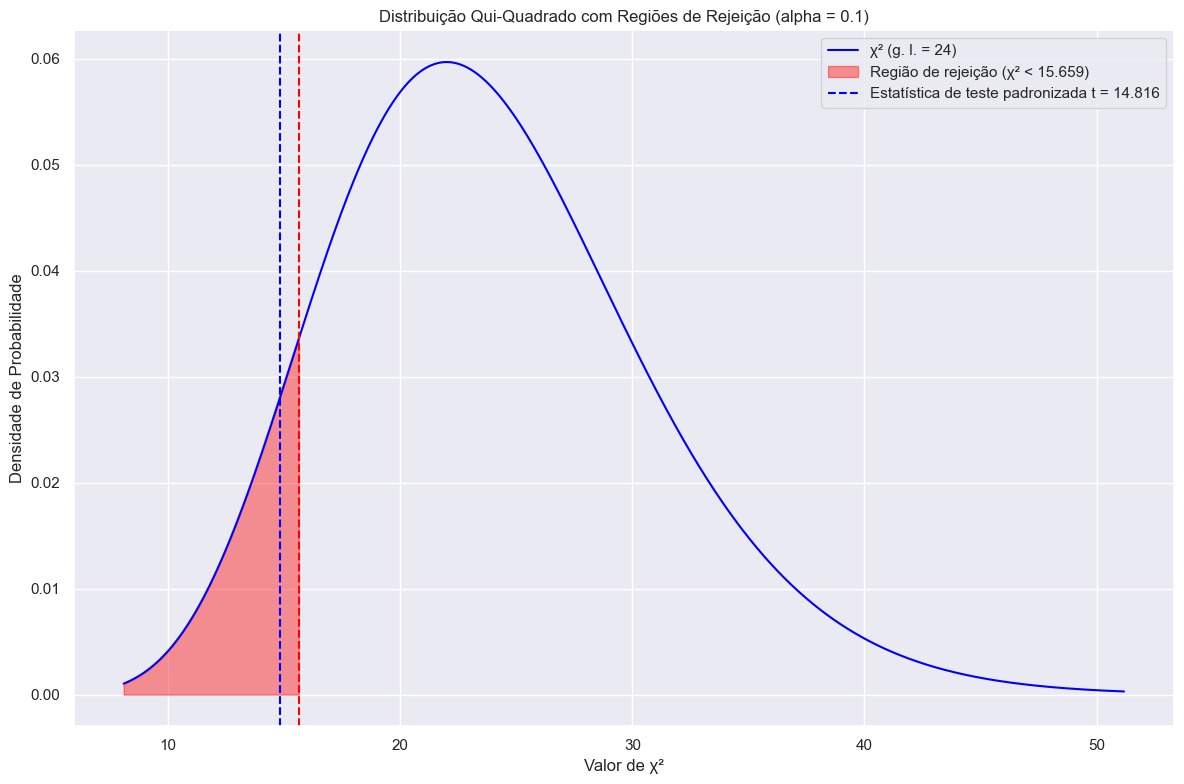

In [139]:
x_quadrado = calcula_estatistica_padronizada_variancia_desvio_padrao(
    n=n,
    estatistica=desvio_padrao_amostral,
    parametro_populacional=desvio_padrao_populacional,
    variancia=False
)

print(x_quadrado)
print(x_quadrado < valor_critico)

plota_distribuicao_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    valor_critico=valor_critico,
    estatistica_teste=x_quadrado,
    tipo_teste='esquerda'
)

### 6. 1. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula deve ser rejeitada porque χ² pertence à região de rejeição.</p>

### 6. 1. 5. Interpretação da decisão no contexto da afirmação original

<p>Há evidência suficiente, ao nível de significância de
10%, para concordar com a afirmação de que o desvio padrão da duração de tempo que leva uma ligação recebida para ser transferida para a
área correta é menor que 1,4 minuto.</p>

## 6. 2. Teste unilateral à direita

<p><b>Enunciado:</b> O porta-voz de um
hospital afirma que o desvio padrão dos tempos de espera dos pacientes no departamento de emergência é
não mais que 0,5 minuto. Uma amostra aleatória de 25
tempos de espera tem um desvio padrão de 0,7 minuto.
Para o nível de significância a = 0,10, há evidência suficiente para rejeitar a afirmação do porta-voz?</p>

In [140]:
desvio_padrao_populacional = 0.5
n = 25
desvio_padrao_amostral = 0.7
alpha = 0.10

graus_liberdade = n - 1

### 6. 2. 1. Escrita das hipóteses em notação matemática

$$
\begin{cases}
H_0: \sigma \leq 0,5\quad(Afirma\c{c}ão.) \\
H_a: \sigma \gt 0,5
\end{cases}
$$


### 6. 2. 2. Cálculo do valor crítico e definição da região de rejeição

In [142]:
valor_critico = calcula_valor_critico_teste_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    tipo_teste='direita'
)

print(valor_critico)
print(f"Região de rejeição: χ² > {valor_critico}")

33.196
Região de rejeição: χ² > 33.196


### 6. 2. 3. Cálculo da estatística de teste padronizada

47.04
True


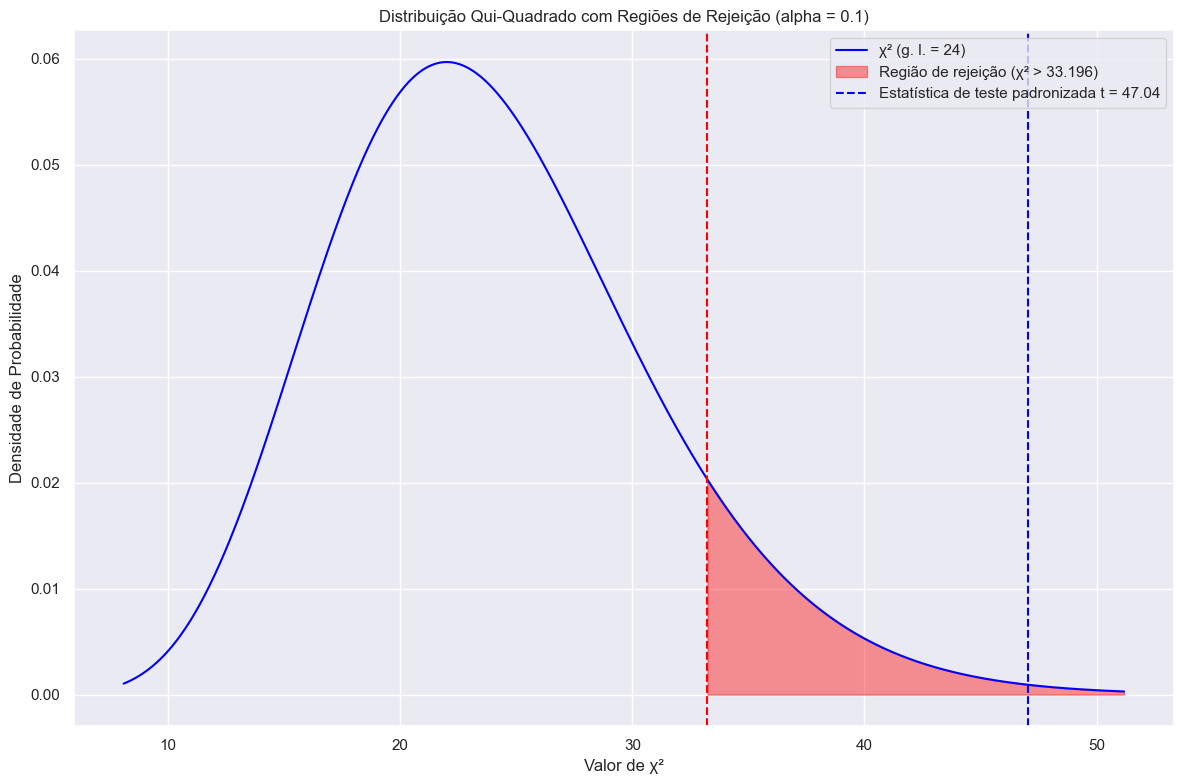

In [144]:
x_quadrado = calcula_estatistica_padronizada_variancia_desvio_padrao(
    n=n,
    estatistica=desvio_padrao_amostral,
    parametro_populacional=desvio_padrao_populacional,
    variancia=False
)

print(x_quadrado)
print(x_quadrado > valor_critico)

plota_distribuicao_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    valor_critico=valor_critico,
    estatistica_teste=x_quadrado,
    tipo_teste='direita'
)

### 6. 2. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula deve ser rejeitada porque χ² pertence à região de rejeição.</p>

### 6. 2. 5. Interpretação da decisão no contexto da afirmação original

<p>Há evidência suficiente, ao nível de significância de 0,10, para rejeitar a afirmação do porta-voz de que o desvio padrão dos tempos de espera no departamento de emergência não é mais que 0,5 minuto.</p>

## 6. 3. Teste bilateral

<p><b>Enunciado:</b> Um fabricante de artigos esportivos afirma que a variância da força
de uma certa linha de pesca é de 15,9. Uma amostra aleatória de 15
rolos de linha tem uma variância de 21,8. Para o nível de significância
a = 0,05, há evidência suficiente para rejeitar a afirmação do fabricante?
Suponha que a população é normalmente distribuída.</p> 

In [ ]:
variancia_populacional = 15.9
n = 15
variancia_amostral = 21.8
alpha = 0.05

graus_liberdade = n - 1

### 6. 3. 1. Escrita das hipóteses em notação matemática

$$
\begin{cases}
H_0: \sigma = 15,9 \quad(Afirma\c{c}ão.) \\
H_a: \sigma \not = 15,9
\end{cases}
$$


### 6. 3. 2. Cálculo dos valores críticos e das regiões de rejeição

In [147]:
valores_criticos = calcula_valor_critico_teste_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    tipo_teste='bilateral'
)

print(valores_criticos)
print(f"Regiões de rejeição: χ² < {valores_criticos[0]}; e χ² > {valores_criticos[1]}")

(5.629, 26.119)
Regiões de rejeição: χ² < 5.629; e χ² > 26.119


### 6. 3. 3. Cálculo da estatística de teste padronizada

19.195
False


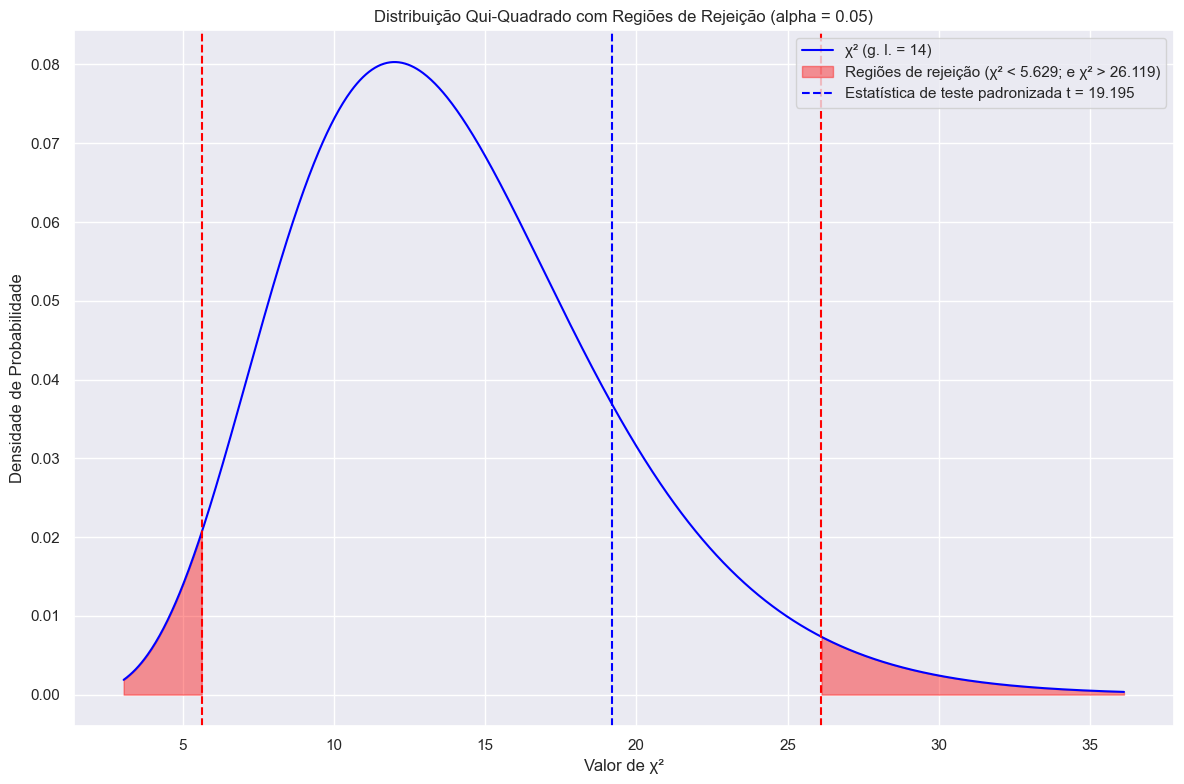

In [150]:
x_quadrado = calcula_estatistica_padronizada_variancia_desvio_padrao(
    n=n,
    estatistica=variancia_amostral,
    parametro_populacional=variancia_populacional
)

print(x_quadrado)
print(x_quadrado < valores_criticos[0] or x_quadrado > valores_criticos[1])

plota_distribuicao_qui_quadrado(
    alpha=alpha,
    graus_liberdade=graus_liberdade,
    valor_critico=valores_criticos,
    estatistica_teste=x_quadrado,
    tipo_teste='bilateral'
)

### 6. 3. 4. Tomada de decisão de rejeitar ou não a hipótese nula

<p>A hipótese nula não deve ser rejeitada porque χ² não pertence a nenhuma das regiões de rejeição</p>

### 6. 3. 5. Interpretação da decisão no contexto da afirmação original

<p>Há evidência suficiente, ao nível de significância de
10%, para concordar com a afirmação de que o desvio padrão da duração de tempo que leva uma ligação recebida para ser transferida para a
área correta é menor que 1,4 minuto.</p>